In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, normaltest
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [130]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 14})

**Описание датаесета**

Статистические данные о фильмах, взятые с сайта IMDB

* **title** - название
* **genre** - жанр
* **year** - год
* **duration** - продолжительность
* **avg_vote** - средняя оценка
* **votes** - количество оценок
* **country** - страна


In [41]:
df_1 = pd.read_csv("/Users/Olga/Downloads/IMDB/IMDb movies.csv")
df = df_1[['title','genre', 'year', 'country', 'duration', 'avg_vote', 'votes']]

df.tail()

,title,genre,year,country,duration,avg_vote,votes
85850,Le lion,Comedy,2020,"France, Belgium",95,5.3,398
85851,De Beentjes van Sint-Hildegard,"Comedy, Drama",2020,Netherlands,103,7.7,724
85852,Padmavyuhathile Abhimanyu,Drama,2019,India,130,7.9,265
85853,Sokagin Çocuklari,"Drama, Family",2019,Turkey,98,6.4,194
85854,La vida sense la Sara Amat,Drama,2019,Spain,74,6.7,102


In [42]:
# Количество строк и столбцов в датасете
df.shape

(85855, 7)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     85855 non-null  object 
 1   genre     85855 non-null  object 
 2   year      85855 non-null  object 
 3   country   85791 non-null  object 
 4   duration  85855 non-null  int64  
 5   avg_vote  85855 non-null  float64
 6   votes     85855 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.6+ MB


In [44]:
# Обзор пропущенных данных. Пропущенных данных нет.
df.isnull().sum()

title        0
genre        0
year         0
country     64
duration     0
avg_vote     0
votes        0
dtype: int64

**Обзор количественных переменных**

In [45]:
# Вывод основных показателей опиательной статистики.

df.describe()

,duration,avg_vote,votes
count,85855.000000,85855.000000,8.585500e+04
mean,100.351418,5.898656,9.493490e+03
std,22.553848,1.234987,5.357436e+04
min,41.000000,1.000000,9.900000e+01
25%,88.000000,5.200000,2.050000e+02
50%,96.000000,6.100000,4.840000e+02
75%,108.000000,6.800000,1.766500e+03
max,808.000000,9.900000,2.278845e+06


**Обзор номинативных переменных**

In [46]:
df_obj_features = df.select_dtypes(include='object').columns.tolist()
df_obj_features

['title', 'genre', 'year', 'country']

**Обработка пропусков**

In [47]:
# Удалим строки,в кототрых пропущенны данные в столбце Country (64 шт.)
df = df.dropna()

In [48]:
df.shape

(85791, 7)

In [49]:
df["year"].unique()

array([1894, 1906, 1911, 1912, 1919, 1913, 1914, 1915, 1916, 1917, 1918,
       1920, 1921, 1924, 1922, 1923, 1925, 1926, 1935, 1927, 1928, 1983,
       1929, 1930, 1932, 1931, 1937, 1938, 1933, 1934, 1936, 1940, 1939,
       1942, 1943, 1941, 1948, 1944, 2001, 1946, 1945, 1947, 1973, 1949,
       1950, 1952, 1951, 1962, 1953, 1954, 1955, 1961, 1956, 1958, 1957,
       1959, 1960, 1963, 1965, 1971, 1964, 1966, 1968, 1967, 1969, 1976,
       1970, 1979, 1972, 1981, 1978, 2000, 1989, 1975, 1974, 1986, 1990,
       2018, 1977, 1982, 1980, 1993, 1984, 1985, 1988, 1987, 2005, 1991,
       2002, 1994, 1992, 1995, 2017, 1997, 1996, 2006, 1999, 1998, 2007,
       2008, 2003, 2004, 2010, 2009, 2011, 2013, 2012, 2016, 2015, 2014,
       2019, 2020, '2012', '2015', '2009', '2013', '2018', '2014', '2017',
       '2011', '2016', '1981', '1975', '2010', '1984', '2007', '2006',
       '2001', '2004', '1979', '2019', '1967', '1978', '2003', '2005',
       '1969', '1990', '1983', '2002', '1996', '2008'

In [50]:
# Исправим год
df.loc[df['year'] == 'TV Movie 2019', 'year'] = '2019'

In [51]:
# Присвоим столбцу year тип данных int
df["year"] = df["year"].astype(int)

***Графическое представление данных***

Построим гистограмму, что бы оценить распределение оценок фильмов avg_vote

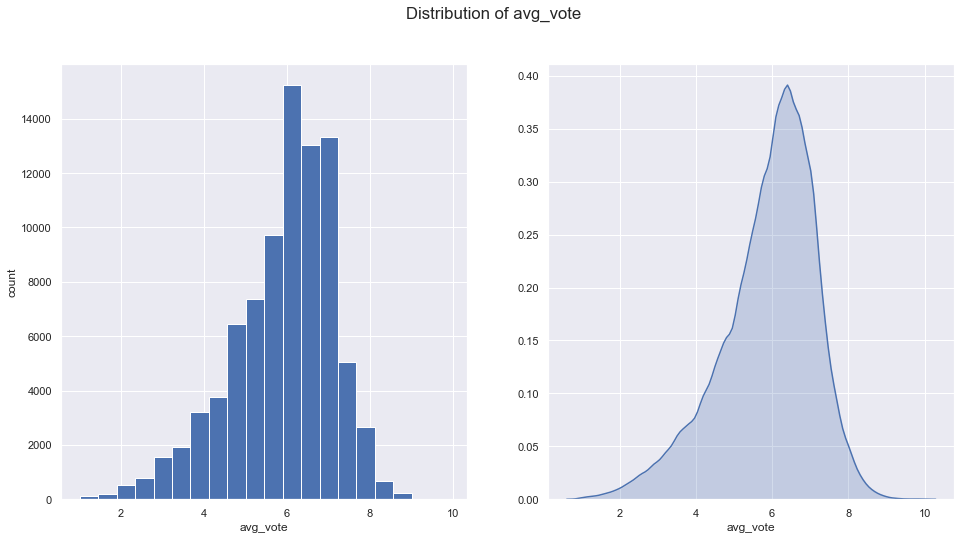

In [52]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
plt.hist(df['avg_vote'], bins = 20)
plt.ylabel('count')
plt.xlabel('avg_vote')

plt.subplot(122)
sns.kdeplot(df['avg_vote'], shade=True, legend=False)
plt.xlabel('avg_vote')

plt.suptitle('Distribution of avg_vote')
plt.show()

Также можно визуализировать распределение при помощи диаграммы boxplot.

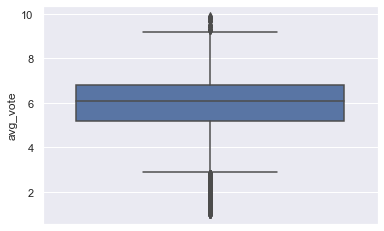

In [53]:
sns.boxplot(df['avg_vote'], orient='v')
plt.show()

Анализируя эти графики, можно сделать вывод, что самая распространенная оценка фильму равняется 6.

Отобразим на диаграмме моду, медиану и срднее значение оценок фильмов.

In [54]:
avg_vote_mean = round(df['avg_vote'].mean(), 2)
avg_vote_median = df['avg_vote'].median()
avg_vote_mode = df['avg_vote'].mode()[0]

avg_vote_mean, avg_vote_median,avg_vote_mode

(5.9, 6.1, 6.4)

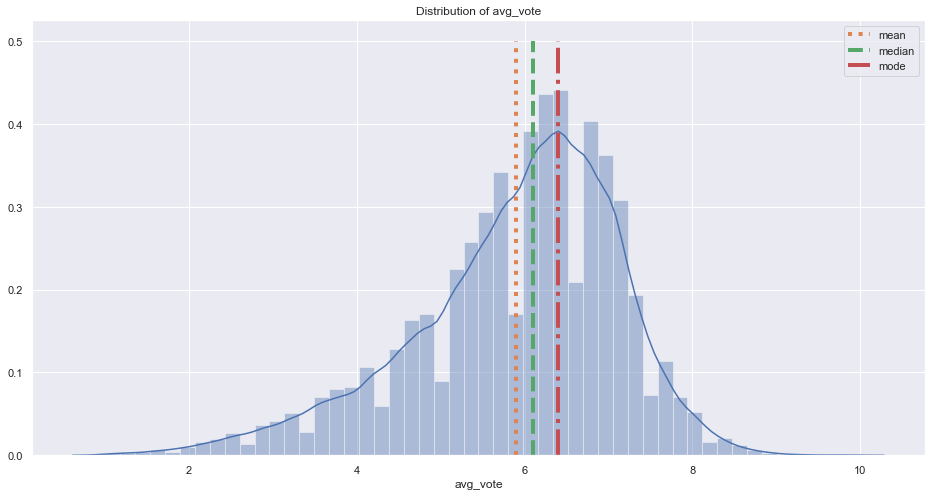

In [55]:

plt.figure(figsize = (16, 8))

sns.distplot(df['avg_vote'])

y = np.linspace(0, 0.5, 100)
plt.plot([avg_vote_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([avg_vote_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([avg_vote_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of avg_vote')
plt.legend()
plt.show()

In [56]:
df["genre"].unique()

array(['Romance', 'Biography, Crime, Drama', 'Drama', ...,
       'Family, Sci-Fi, Thriller', 'Family, War', 'Crime, War'],
      dtype=object)

**Проверка нормальности распределения оценок зрителей (тесты Шапиро-Уилка и Пирсона)**

In [126]:
anova_df = df[(df.genre == 'Comedy') | (df.genre == 'Drama')|(df.genre == 'Thriller')|(df.genre == 'Horror')]
anova_df

,title,genre,year,country,duration,avg_vote,votes
2,Den sorte drøm,Drama,1911,"Germany, Denmark",53,5.8,188
9,Richard III,Drama,1912,"France, USA",55,5.5,225
10,Atlantis,Drama,1913,Denmark,121,6.6,331
12,Il calvario di una madre,Drama,1913,Sweden,96,7.1,948
14,Ma l'amor mio non muore...,Drama,1914,Italy,90,6.2,100
...,...,...,...,...,...,...,...
85847,Ottam,Drama,2019,India,120,7.4,494
85848,Pengalila,Drama,2019,India,111,8.8,553
85850,Le lion,Comedy,2020,"France, Belgium",95,5.3,398
85852,Padmavyuhathile Abhimanyu,Drama,2019,India,130,7.9,265


In [57]:
# тест Шапиро-Уилка

def test_shapiro(y):
    data = y
    # normality test
    stat, p = shapiro(data)
    print('\033[1m\033[4mStatistics = %.3f, p-value = %.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')
    print()

In [58]:
# Критерий согласия Пирсона

def test_pirsona(y):
    # normality test
    stat, p = normaltest(y) 
    print('\033[1m\033[4mStatistics = %.3f, p-value = %.3f' % (stat, p))
    
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Принять гипотезу о нормальности')
    else:
        print('Отклонить гипотезу о нормальности')
    print()

In [127]:
y = anova_df['avg_vote'].values
test_shapiro(y)
test_pirsona(y)

Statistics = 0.959, p-value = 0.000
Отклонить гипотезу о нормальности

Statistics = 2169.268, p-value = 0.000
Отклонить гипотезу о нормальности



ANOVA

In [ ]:
H0 = ('различий среди средних оценок фильмов жанров: драма, триллер, комедия, ужасы нет.')
H1 = ('различия среди средних оценок фильмов жанров: драма, триллер, комедия, ужасы есть.')
